# <b>Assignment Python 3 "Bank Marketing Dataset"<b>

#### Bela Devianti Retnoningsih

## **Objective:** 
## Predict if the client will subscribe (yes/no) a term deposit (variable y)

## **Import Libraries**

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import tree
from sklearn import svm

## **Prepping Dataset**

#### Import Dataset from Folder

In [2]:
dataset = pd.read_csv('bank-additional-full.csv', sep=';')

dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Find shape of the data

In [3]:
dataset.shape

(41188, 21)

##### **Highligt:** Concluded that the data has 21 columns and 41188 rows.

### Analytic of missing values

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<AxesSubplot:>

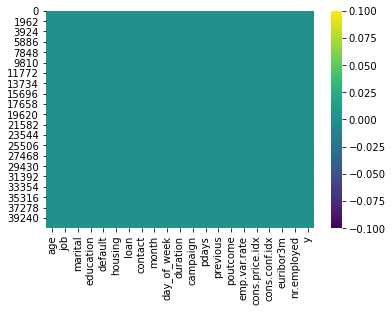

In [6]:
sns.heatmap(dataset.isnull(),cmap='viridis')

##### **Highlight:** Great News! The dataset is clear from the missing value which means we don't have to do data cleaning.

### Classify The Dataset Category

##### Change the Dataset into string or numeric as its category.

###### **String Data**
###### Classify the dataset type object.

In [7]:
cat = dataset.dtypes[dataset.dtypes=='object'].index

cat

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

###### **Numeric Data**
###### Change the dataset type from an integer into float.

In [8]:
numb = dataset.dtypes[dataset.dtypes == 'int64'].index | dataset.dtypes[dataset.dtypes=='float64'].index

numb

Index(['age', 'campaign', 'cons.conf.idx', 'cons.price.idx', 'duration',
       'emp.var.rate', 'euribor3m', 'nr.employed', 'pdays', 'previous'],
      dtype='object')

## **Data Exploration**

In [9]:
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Outlier Analysis
### Float Data

#### **Age**

C:\Users\Bela\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

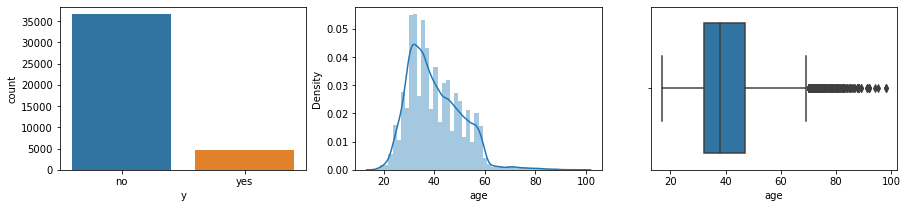

In [10]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
sns.countplot(x='y', data=dataset)
plt.subplot(1,3,2)
sns.distplot(dataset['age'])
plt.subplot(1,3,3)
sns.boxplot(dataset['age'])

###### **Highlight:** Outliers identified in age >70
###### Drop the outliers

In [11]:
dataset_a = dataset[(dataset[['age']]<70)]

C:\Users\Bela\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

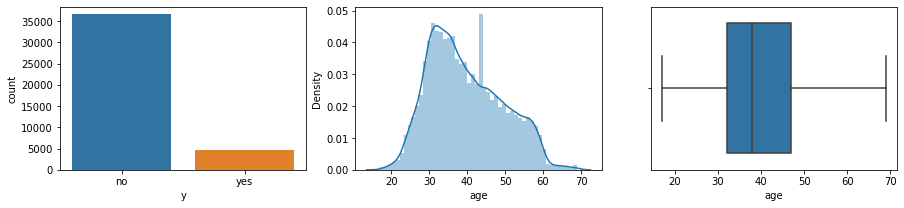

In [12]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
sns.countplot(x='y', data=dataset)
plt.subplot(1,3,2)
sns.distplot(dataset_a['age'])
plt.subplot(1,3,3)
sns.boxplot(dataset_a['age'])

##### **Campaign**

C:\Users\Bela\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='campaign'>

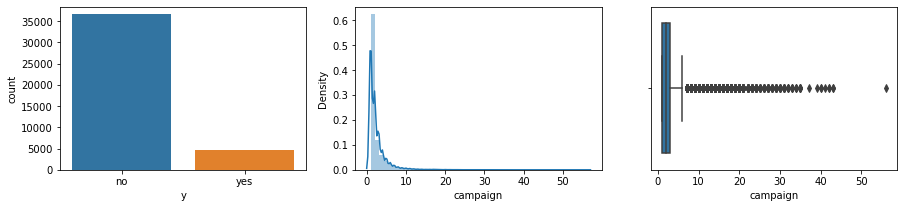

In [13]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
sns.countplot(x='y', data=dataset)
plt.subplot(1,3,2)
sns.distplot(dataset['campaign'])
plt.subplot(1,3,3)
sns.boxplot(dataset['campaign'])

##### **Campaign**

C:\Users\Bela\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='campaign'>

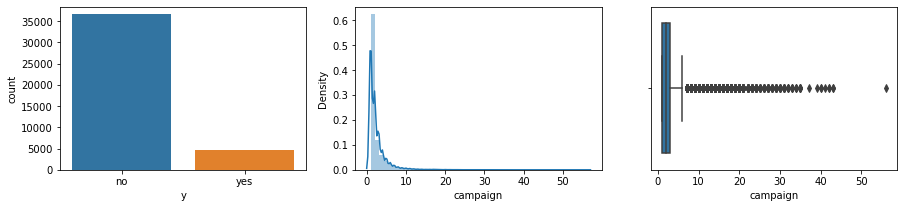

In [14]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
sns.countplot(x='y', data=dataset)
plt.subplot(1,3,2)
sns.distplot(dataset['campaign'])
plt.subplot(1,3,3)
sns.boxplot(dataset['campaign'])

### String Data

<AxesSubplot:xlabel='loan', ylabel='count'>

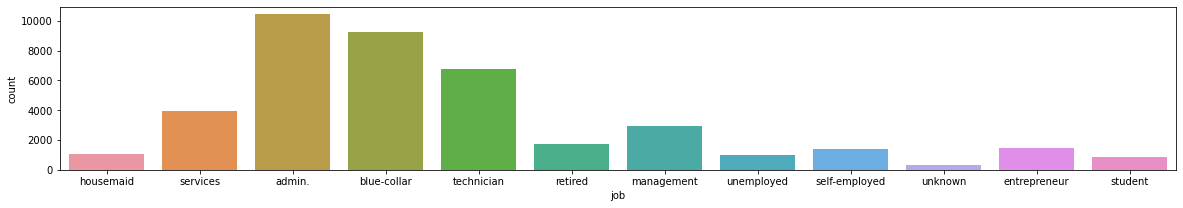

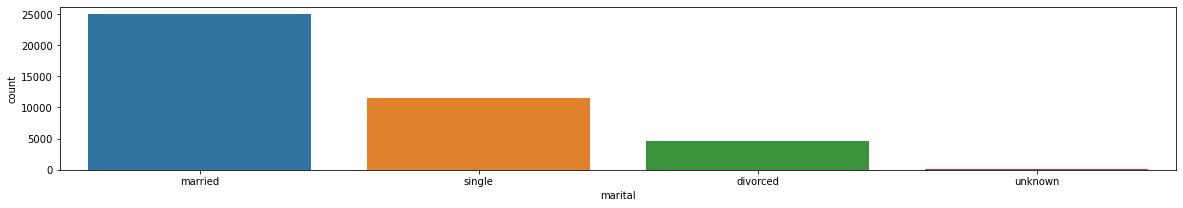

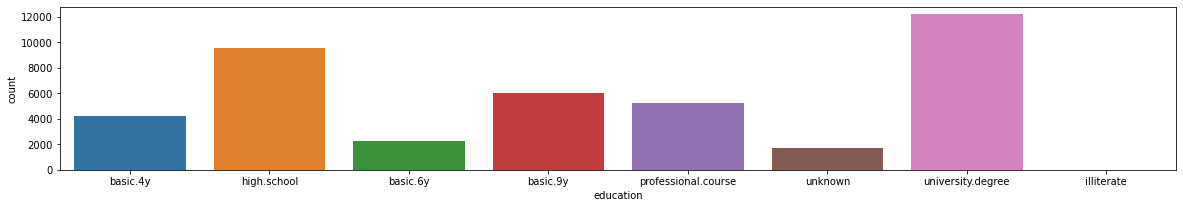

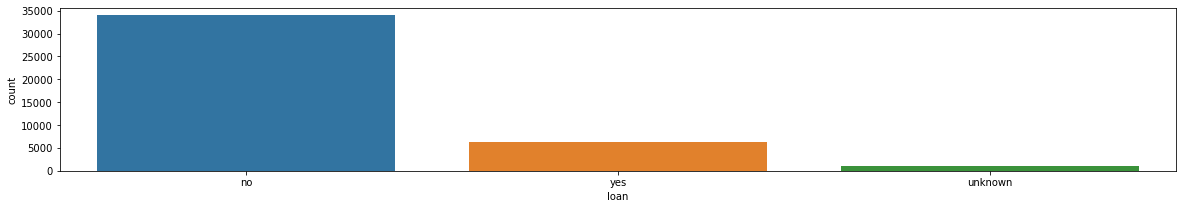

In [15]:
plt.figure(figsize=(20,3))
sns.countplot(x='job', data=dataset)

plt.figure(figsize=(20,3))
sns.countplot(x='marital', data=dataset)

plt.figure(figsize=(20,3))
sns.countplot(x='education', data=dataset)

plt.figure(figsize=(20,3))
sns.countplot(x='loan', data=dataset)

## **Classification**

### Convert string into numeric using LabelEncoder

In [16]:
le = LabelEncoder()

for cols in cat:
    dataset[cols] = le.fit_transform(dataset[cols])

### Divide the Data to Training and Testing

In [17]:
x = dataset.drop('y',1) # independent variable
y = dataset['y'] # dependet variable

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=13)

### Logistic Regression Classification

In [19]:
model_reg = LogisticRegression(solver='liblinear')

In [20]:
model_reg.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [21]:
model_reg.score(x_train, y_train)

0.9106221547799697

##### Predict the testing data

In [22]:
reg_pred = model_reg.predict(x_test) 

##### Check the accuracy

In [24]:
acc_model_reg = accuracy_score(y_test, reg_pred)

acc_model_reg

0.9095654285020636

##### Confusion Matrix

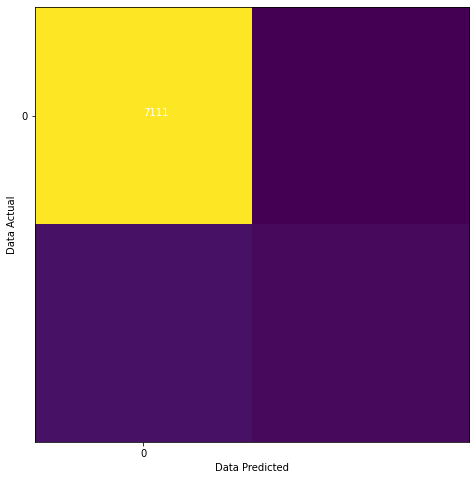

In [26]:
cm = confusion_matrix(y_test, reg_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)

ax.xaxis.set(ticks=range(1))
ax.yaxis.set(ticks=range(1))

ax.set_ylabel('Data Actual')
ax.set_xlabel('Data Predicted')

for i in range(1):
    for j in range(1):
        ax.text(j, i, cm[i, j], color='white')
        
plt.show()

##### Report

In [28]:
print(classification_report(y_test, reg_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7315
           1       0.65      0.41      0.51       923

    accuracy                           0.91      8238
   macro avg       0.79      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



### K-Nearet Neighbors

In [29]:
model_knn = KNeighborsClassifier(n_neighbors=3)

In [30]:
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

##### Predict the testing data

In [31]:
knn_pred = model_reg.predict(x_test) 

##### Check the accuracy

In [32]:
acc_model_knn = accuracy_score(y_test, knn_pred)

acc_model_knn

0.9095654285020636

##### Search the best k-value

In [35]:
error = []

for i in range(1, 40):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(x_train, y_train)
    pred_i = model_knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
print(error)

[0.11179898033503277, 0.10111677591648459, 0.09662539451323136, 0.09771789269240107, 0.09310512260257343, 0.09456178684146638, 0.09067734887108521, 0.09322651128914786, 0.0905559601845108, 0.09176984705025491, 0.08970623937848993, 0.08958485069191552, 0.08739985433357611, 0.08909929594561787, 0.08873512988589463, 0.08885651857246904, 0.08861374119932022, 0.08934207331876669, 0.08934207331876669, 0.08909929594561787, 0.08776402039329935, 0.08934207331876669, 0.08861374119932022, 0.0894634620053411, 0.08800679776644817, 0.08958485069191552, 0.0883709638261714, 0.08970623937848993, 0.08909929594561787, 0.08994901675163874, 0.08922068463219228, 0.08885651857246904, 0.08776402039329935, 0.08776402039329935, 0.08824957513959698, 0.0894634620053411, 0.08958485069191552, 0.0894634620053411, 0.08849235251274581]


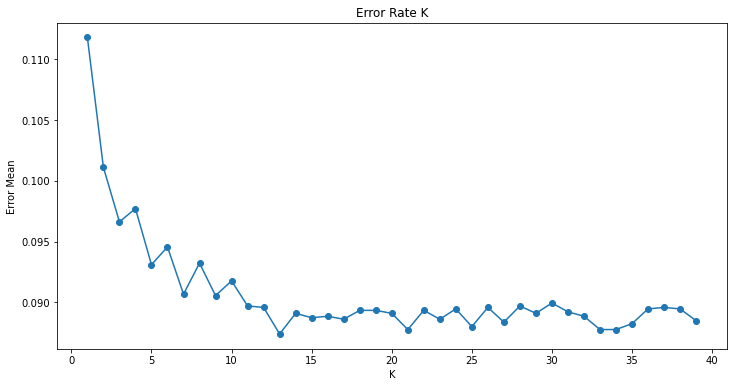

In [36]:
plt.figure(figsize=(12, 6))

plt.plot(range(1, 40),
         error,
         marker='o')

plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error Mean')

plt.show()

##### **Highlight:** The best k-value is around 14

### Naive Bayes

In [48]:
model_gnb = GaussianNB()

In [49]:
model_gnb.fit(x_train, y_train)

GaussianNB()

##### Predict the testing data

In [50]:
gnb_pred = model_gnb.predict(x_test)

##### Check the accuracy

In [51]:
acc_model_gnb = metrics.accuracy_score(y_test, gnb_pred)

acc_model_gnb

0.8457149793639233

### Decision Tree

In [52]:
model_dtc = DecisionTreeClassifier()

In [53]:
model_dtc.fit(x_train, y_train)

DecisionTreeClassifier()

##### Predict the testing data

In [55]:
dtc_pred = model_dtc.predict(x_test)

##### Check the accuracy

In [80]:
acc_model_dtc = accuracy_score(y_test, dtc_pred)

acc_model_dtc

0.8932993445010925

### Random Forest

In [64]:
model_rf = RandomForestClassifier(n_estimators=100)

In [65]:
model_rf.fit(x_train, y_train)

RandomForestClassifier()

##### Predict the testing data

In [66]:
rf_pred = model_rf.predict(x_test)

##### Check the accuracy

In [68]:
acc_model_rf = accuracy_score(y_test, rf_pred)

acc_model_rf

0.9157562515173586

### Support Vector Machine

In [70]:
model_svm = svm.SVC()

In [72]:
model_svm.fit(x_train, y_train)

SVC()

##### Predict the testing data

In [74]:
svm_pred = model_svm.predict(x_test)

##### Check the accuracy

In [82]:
acc_model_svm = accuracy_score(y_test, svm_pred)

## **Conclusion**

### The Accuracy of All Classification

In [83]:
print('Logistic Regression Model:', acc_model_reg)
print('K-Nearest Neighbors Model:', acc_model_knn)
print('Naive Bayes Model:', acc_model_gnb)
print('Decision Tree Model:', acc_model_dtc)
print('Random Forest Model:', acc_model_rf)
print('Support Vector Machine Model:', acc_model_svm)

Logistic Regression Model: 0.9095654285020636
K-Nearest Neighbors Model: 0.9095654285020636
Naive Bayes Model: 0.8457149793639233
Decision Tree Model: 0.8932993445010925
Random Forest Model: 0.9157562515173586
Support Vector Machine Model: 0.8990046127700898


### The best model to predict the client's decision is Random Forest Model. This model give the best accurate prediction about 91.5756%.